<a href="https://colab.research.google.com/github/jasnoor16/surprise/blob/main/Another_copy_of_Key_Norquest2_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC

## Introduction

Background story...

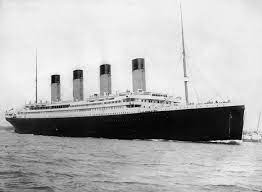



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot
import sklearn.tree as skTree
import sklearn.metrics as skMetrics
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

## Subtitle

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# import io
# df2 = pd.read_csv(io.BytesIO(uploaded['titanictrain.csv']))

# Importing the dataset with read_csv and displaying the data.


In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

df = pd.read_csv("titanictrain.csv")
df.head(5)  # Used to display top 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail(5) # Used to display last 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# **Data** **Exploration**

# Accessing specific coloums which are needed.

In [ ]:
# Clean Train Data
df= df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Get more information about the database by using describe method.

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# find columns with nan in Training set
for NAN in df.columns:
    if df[NAN].isna().any()==True:
        print("Total missing values in {} for Training data is". format(NAN))
        print(df[NAN].isna().sum())

Total missing values in Age for Training data is
177
Total missing values in Embarked for Training data is
2


In [ ]:
#Clean Train Data
df['Age'].fillna(df['Age'].mean(), inplace=True)
#deleting the 2 missing values for embarked
df=df[df['Embarked'].isna()==False]
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Counting the occurences of variables


In [ ]:
df["Sex"].value_counts()


,count
Sex,
male,577
female,312


# Using .nunique() to count number of unique values that occur in dataset or in a column

In [ ]:
df.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,89
SibSp,7
Parch,7
Fare,247
Embarked,3


# Filtering

**AND operator**

In [ ]:
df_age = df["Age"] < 50
df_sex_mask = df["Sex"] == "female"
df[df_age & df_sex_mask].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


**OR operator**

In [ ]:
df_sex = df["Sex"] == "Male"
df_age_mask = df["Age"] > 70
df[df_sex | df_age_mask]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
851,0,3,male,74.0,0,0,7.7750,S


# Calculating how many passengers survived.
Here 1 = survived, and 0 = Not survived.


In [ ]:
count = df['Survived'].value_counts()
print(count)
# Let us see that in percentage.

percentage = df['Survived'].value_counts() * 100 / len(df)
print(percentage)

Survived
0    549
1    340
Name: count, dtype: int64
Survived
0    61.754781
1    38.245219
Name: count, dtype: float64


<Axes: xlabel='Survived'>

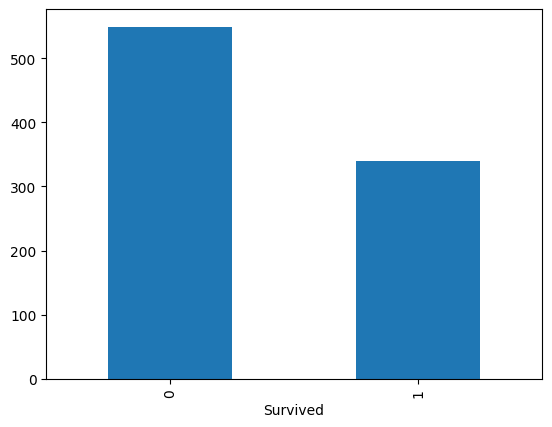

In [ ]:
%matplotlib inline
color = 0.5
df['Survived'].value_counts().plot(kind = 'bar')

In [ ]:
# %% now lets view data types to the features
print(df.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [ ]:
# %% now lets assign data types to the features
Integer_features=['Age','SibSp','Parch']
Categorical_features=['Pclass','Sex','Embarked']

for FEATURES in Integer_features:

    df[FEATURES] = df[FEATURES].astype('int64')

for FEATURES in Categorical_features:
    df[FEATURES] = df[FEATURES].astype('category')

In [ ]:
# %% now lets view data types to the features
print(df.dtypes)

Survived       int64
Pclass      category
Sex         category
Age            int64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object


# Splitting the Dataset

Vertical Split

In [ ]:
# %% now lets separate the label from the Training data set
TargetLabel=df['Survived']
# now we will remove the target label (Survived from the training clean data set)
df= df.drop(['Survived'],axis=1)

In [ ]:
# # %% now lets convert this categorical varibales into numerical by creating dummy variables. One hot encoding
# ## even though Pclass is in numbers, we would still convert into dummy varibales because the three classes is not ordinal
for FEATURES in Categorical_features:
    df = pd.concat([df, pd.get_dummies(df[FEATURES], prefix=FEATURES)], axis=1).drop([FEATURES], axis=1)

In [ ]:
df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22,1,0,7.2500,False,False,True,False,True,False,False,True
1,38,1,0,71.2833,True,False,False,True,False,True,False,False
2,26,0,0,7.9250,False,False,True,True,False,False,False,True
3,35,1,0,53.1000,True,False,False,True,False,False,False,True
4,35,0,0,8.0500,False,False,True,False,True,False,False,True


Horizontal Split

In [ ]:
# %% lets split the training data into training and validation data
X_train, X_test, y_train, y_test = train_test_split(df, TargetLabel, test_size=0.25, random_state=42)

# **Choosing the Right ML Model**

# Decision Trees

In [ ]:
#Importing Libraries
# import joblib
import pandas as pd
from sklearn import tree

# import warnings
# warnings.filterwarnings('ignore', category=FutureWarning)
# warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
#Fitting the Model and Evaluating
dtree = tree.DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = dtree.predict(X_test)


In [ ]:


# Print the predicted labels
print("Predicted Labels:\n", y_pred)


Predicted Labels:
 [0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1]


In [ ]:


# Create a DataFrame to display actual and predicted labels side by side
predictions_df = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': y_pred})

# Display the DataFrame
print(predictions_df)


     Actual Labels  Predicted Labels
281              0                 0
435              1                 1
39               1                 0
418              0                 0
585              1                 1
..             ...               ...
425              0                 0
102              0                 0
200              0                 0
399              1                 1
669              1                 1

[223 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.757847533632287
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       141
           1       0.66      0.72      0.69        82

    accuracy                           0.76       223
   macro avg       0.74      0.75      0.74       223
weighted avg       0.76      0.76      0.76       223

Confusion Matrix:
 [[110  31]
 [ 23  59]]


Define the metrics in the report


**Accuracy** - *Accuracy is the ratio of sum of correctly predicted observations (true positive + true negative ) and total observations.*

*Accuracy = TP+TN / TOTAL OBSERVATIONS*

*Accuracy calculates the overall performance of the model. In this case, accuracy is approx 0.75% which can also be calculates via the formula given. It means that 0.75% model actually predicted correct values about both survivors and non-survivors from the training set.*



**Precision** - *Precision calculates how much positive the model is which means how good the model is in making actual true sure predictions.*

*Precision = TP / TP + FP*

*Here, Precision for class 0 is 0.83 which refers that 83 % people who are calcualted as not survived actually did not survive . Moreover, Precision for class 1 is 0.66 which refers that 66 % people who are calculated as survived actually survived.*

**Recall** - *Recall measures how much true positive values the model is able to find.*

*Recall = TP / TP + FN*


**Confusion Matrix** - *Confusion matrix is a kind of matrix which is used to evaluate the model. It depicts the number of positive and negative predictions and predictions which are actually positive or not. It helps to understand how well the model is.*

*TN = True negative which means all the negative predictions made by model which are actually negative. HEre, TN is 110 which means 110 people actually did not survive.*

*TP = True positive which means all the positive predictions made by model which are actually positive. Here, TP is 59 which means 59 people actually survived.*

*FP = False Positive which means the values which were negative in actual but were predicted as postive. Here, FP is 31 which means 31 people died but were predicted as survived.*

*FN = False Negative which means the values which were positive in actual but were predicted as negative. Here, FN is 23 which means 23 people survived but were predicted as died.*

# Try other Models: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Fitting the Model and Evaluating
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_predrf = rf.predict(X_test)

In [ ]:
# Print the predicted labels
print("Predicted Labels:\n", y_predrf)

Predicted Labels:
 [0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 1]


In [ ]:
# Create a DataFrame to display actual and predicted labels side by side
predictions_df = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': y_predrf})

# Display the DataFrame
print(predictions_df)


     Actual Labels  Predicted Labels
281              0                 0
435              1                 1
39               1                 1
418              0                 0
585              1                 1
..             ...               ...
425              0                 0
102              0                 0
200              0                 0
399              1                 1
669              1                 1

[223 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_predrf)
report = classification_report(y_test, y_predrf)
conf_matrix = confusion_matrix(y_test, y_predrf)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7937219730941704
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       141
           1       0.73      0.70      0.71        82

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223

Confusion Matrix:
 [[120  21]
 [ 25  57]]


Repeat steps and generate report

# kNN

In [ ]:
#importing Libraries
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
#Fitting the Model and Evaluating
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
# Print the predicted labels
print("Predicted Labels:\n", y_pred_knn)

Predicted Labels:
 [0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1
 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 0]


In [ ]:
# Create a DataFrame to display actual and predicted labels side by side
predictions_df = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': y_pred_knn})

# Display the DataFrame
print(predictions_df)

     Actual Labels  Predicted Labels
281              0                 0
435              1                 1
39               1                 1
418              0                 1
585              1                 0
..             ...               ...
425              0                 0
102              0                 0
200              0                 0
399              1                 0
669              1                 0

[223 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7130044843049327
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       141
           1       0.63      0.54      0.58        82

    accuracy                           0.71       223
   macro avg       0.69      0.68      0.68       223
weighted avg       0.71      0.71      0.71       223

Confusion Matrix:
 [[115  26]
 [ 38  44]]


In [ ]:
#knn looking better than both Decision Tree  and Random Forest on training set. But the validation scores are way ( Overfitting problems maybe?)

# AutoEDA Using SweetViz

In [ ]:
# !pip install sweetviz

In [ ]:
# import sweetviz as sv

# orig_data_report = sv.analyze(df)
# orig_data_report.show_notebook()

# Interview Readiness Questions

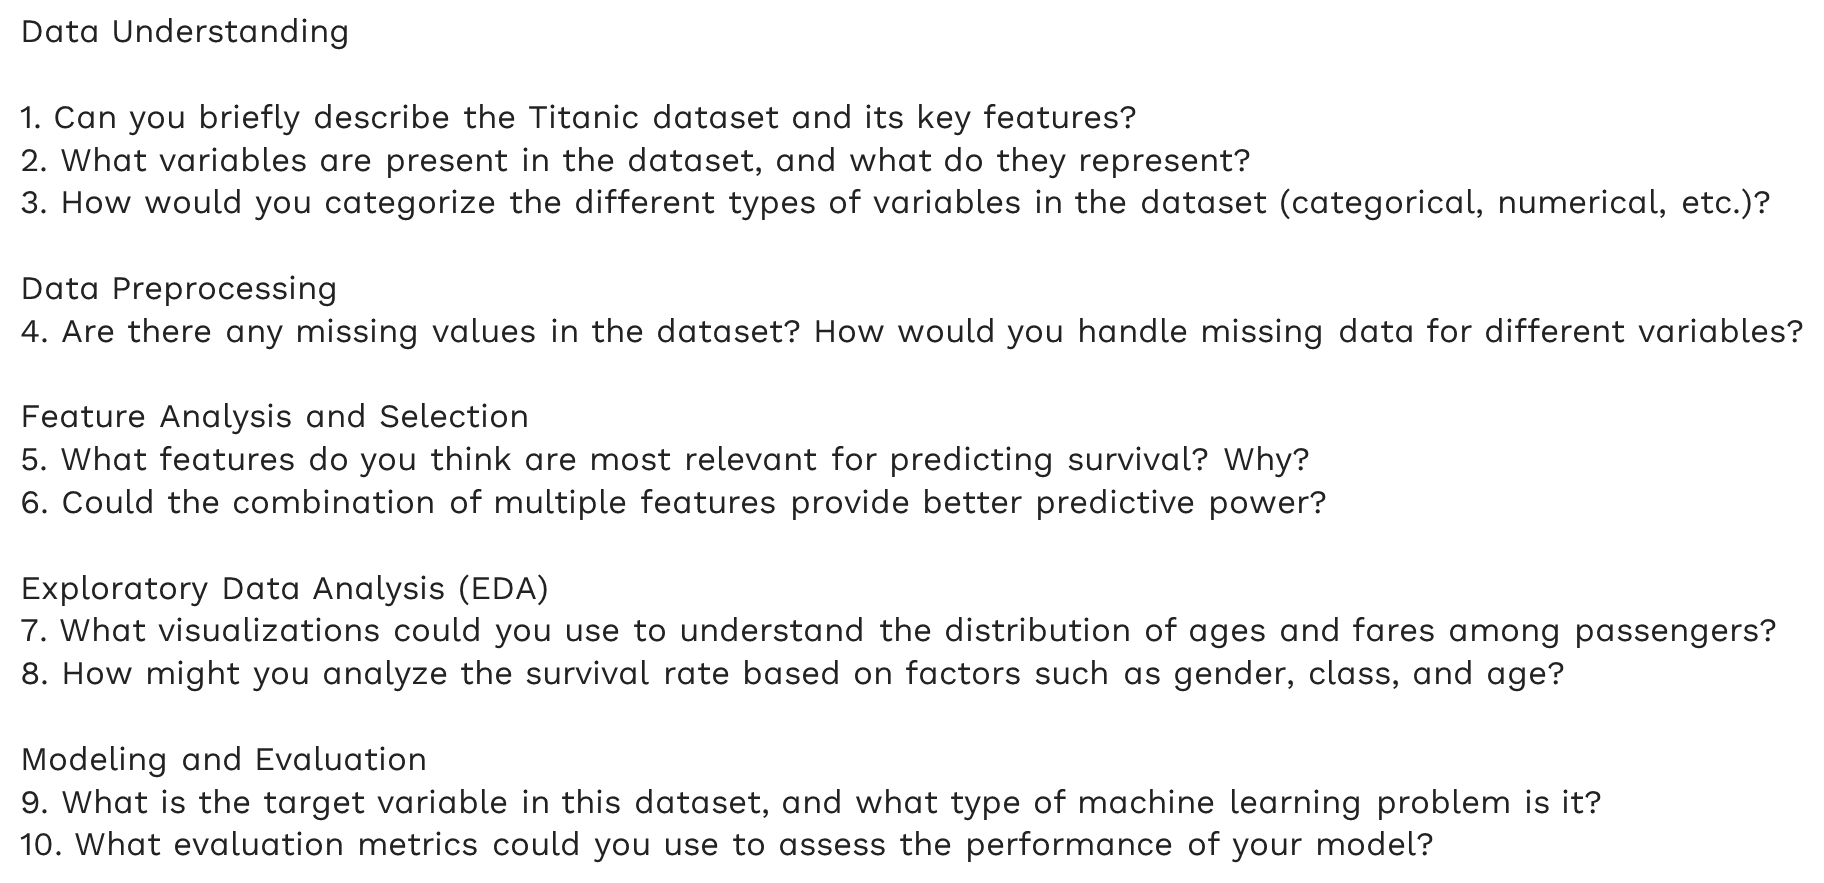

**1 Answer:** Titanic dataset is an information about the passengers who boarded the ship and due to a disaster, how many of them survived or not with some features such as their age, class ticket they had, sex etc. The target here is who survived and not which depends on their sex, age, cabin or port from where they embarked.
***************************************************************************
**2 Answer:** There are different variables present in dataset which provides valauable inisights for survival rates of passangers such as:

Passenger ID: It is ID of specific passenger who boarded the ship.


Survived: It shows those who survived with 1 and who did not survive with 0 .

Pclass: It shows the class passenger boarded.

Name: This column shows the unique names of all passengers.

Sex: This shows what is the gender of a passenger.

Age: Age of the passengers.

Sibsp: If passengers boarded ship had any siblings or spouse.

Parch: It shows if passengers had parents or children.

Ticket: It shows ticket number of passengers.

Fare: Amount charged to passengers .

Cabin: What cabin passengers were assigned to.

Embarked: From which location they ported.
******************************************************************************
**3 Answer:** There are some categorical as well as numerical variables present inside the dataset such as

Survived - Categorical variable in binary form (0 and 1)

P class - Categorical variable in ordinal form ( 1, 2 and 3)

Sex - Categorical variable in binary (M and F)

Embarked - Categorical variable in nominal form. ( C, S and Q)

Age - Numerical variable in continuous form.

Sibsp - Numerical variable in discrete form.

Parch - Numerical variable in discrete form.

Fare - Numerical varibale in continuous form.
****************************************************************************
**4 Answer:** The dataset contained around 177 missing values in the `age` column and 2 missing values in the `embarked` column. Additionally, the `Cabin` column had a significant number of missing values. To address this, the missing values in the 'age' column were filled with the mean age calculated from the available data. Since 'embarked' had only 2 missing values, those corresponding rows were simply removed. Furthermore, the 'Cabin' column was deleted because it didn't contribute to understanding the factors impacting survival.
******************************************************************************
**5 Answer:** When predicting survival, certain factors carry more weight. Firstly, gender plays a crucial role, with females showing higher survival rates than males.
Additionally, age is a significant factor; younger individuals tend to have a better chance of survival.
The passenger class, or Pclass, is also indicative of survival rates, with higher class passengers having a better chance of survival.
Fare could also play a role, as passengers who paid more may have had access to better safety measures.
Lastly, the port of embarkation could also influence survival rates.
*****************************************************************************
**6 Answer:** I believe that analyzing different combinations of features can offer a more comprehensive understanding of survival rates. For instance, if we correlate "sex" with "pclass," we may find that women in higher classes have an even greater chance of survival. Additionally, by considering "age" in combination with "pclass," we might discover that younger individuals in higher classes can better ensure their safety by following improved safety protocols.
****************************************************************************
**7 Answer:** If we want to see how many passengers of certain ages or fares got on the ship, we can check out bar charts or histograms. These visualizations help us understand the distribution of ages and fares among passengers.
*******************************************************************************
**8 Answer:** Gender, class and age plays a significant role in survival.
Firstly, gender affects survival because it was seen through a graph that larger percentage of females survived than males. Maybe, due to the reason that females are evacuated first than males.
Secondly, Pclass also affected survival. Passengers who boarded first class have much better chances of survival than others because thay migh have access to better safety procedures.
Thirdly, age can be a factor in survival as elder passengers have more difficulty in escaping, younger passenger can escape easily. also, women and child were evacuated first which enhances survival rate of younger passengers.
So, consequently, female in first class have much better chances of survival or younger passenger in first class also have better survival chances. Moreover, elder male passenger in third class might have lower survival chances.
These factors can be analyzed by plotting different graphs such as a showing survival rate accross pclass in terms of gender or age, heatmap can also show survival rates for different groups and scatterplot can show relationship between age and survival or gender, class and survival.
****************************************************************************
**9 Answer:** The target variable in the given dataset is column `Survived` which shows what kind of passengers survived or not depending upon different features dataset has. This is a type of supervised machine learning problem because we have labelled data where we know whether passenger survived or not ans we're trying to predict for testing data (unseen data). Specifically, it is a classification problem because we're classifying in survived (1) or not survived (0).
****************************************************************************
**10 Answer:** The evaluation metrics used to calculate the performance of matrix can be determining how accurate model is, its accuracy , precision or recall. Also, confusion matrix is used to show proper insights. This is like a table that shows where the model is getting things right and wrong. It shows four outcomes: passengers who were predicted correctly as survivors (true positives), passengers correctly predicted as not surviving (true negatives), and the two types of mistakes — passengers predicted to survive but didn’t (false positives), and passengers predicted not to survive but actually did (false negatives). This gives a clear picture of how model is performing and where it's making errors.